In [1]:
import pandas as pd
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, BernoulliRBM
warnings.filterwarnings("ignore")

In [2]:
seinfeld = pd.read_csv('seinfeld episode rankings.csv')

In [3]:
seinfeld

,Title,Plot,Quotability/cultural impact,Laughs,Total score,IMDb rating,IMDb rank,Notes,Season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
seinfeld.columns=['title','plot','quotability','laughs','total_score','imdb_rating','imdb_rank','notes','season','episode']

In [5]:
#seinfeld=seinfeld[seinfeld.season<7]

In [6]:
seinfeld.sort_values('total_score',ascending=False)

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
77,the_marine_biologist,5.0,9.0,52.0,101.739130,9.2,5.0,NaN,5.0,14.0
83,the_hamptons,5.0,9.0,48.0,93.913043,8.9,10.0,"""Shrinkage""",5.0,20.0
50,the_contest,5.0,10.0,31.0,67.391304,9.6,1.0,first appearance of Estelle.,4.0,11.0
74,the_conversion,5.0,9.0,30.0,58.695652,8.1,112.0,NaN,5.0,11.0
84,the_opposite,4.0,9.0,31.5,49.304348,9.6,1.0,NaN,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
scripts = pd.read_csv('seinfeld_data/scripts.csv')

In [8]:
episodes = pd.read_csv('seinfeld_data/episode_info.csv')

In [9]:
episodes = episodes.drop(columns='Unnamed: 0')

In [10]:
episodes.Title = episodes.Title.astype(str)

In [11]:
episodes.Title = episodes.Title.str.lower().str.replace(' ','_').str.replace(',','')

In [12]:
scripts = scripts.drop(columns='Unnamed: 0')

In [13]:
scripts[0:211].SEID = 'S01E00'
scripts[0:211].EpisodeNo = 0.0

In [14]:
scripts['line']=scripts.Character.str.strip() +': ' + scripts.Dialogue.str.strip()

In [15]:
episodes.SEID[0] = 'S01E00'
episodes.EpisodeNo[0] = 0.0

In [16]:
scripts

,Character,Dialogue,EpisodeNo,SEID,Season,line
0,JERRY,Do you know what this is all about? Do you kno...,0.0,S01E00,1.0,JERRY: Do you know what this is all about? Do ...
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,S01E00,1.0,"JERRY: (pointing at Georges shirt) See, to me,..."
2,GEORGE,Are you through?,0.0,S01E00,1.0,GEORGE: Are you through?
3,JERRY,"You do of course try on, when you buy?",0.0,S01E00,1.0,"JERRY: You do of course try on, when you buy?"
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,S01E00,1.0,"GEORGE: Yes, it was purple, I liked it, I dont..."
...,...,...,...,...,...,...
54611,JERRY,Grand theft auto - don't steal any of my jokes.,23.0,S09E23,9.0,JERRY: Grand theft auto - don't steal any of m...
54612,PRISONER 3,You suck - I'm gonna cut you.,23.0,S09E23,9.0,PRISONER 3: You suck - I'm gonna cut you.
54613,JERRY,"Hey, I don't come down to where you work, and ...",23.0,S09E23,9.0,"JERRY: Hey, I don't come down to where you wor..."
54614,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",23.0,S09E23,9.0,"GUARD: Alright, Seinfeld, that's it. Let's go...."


In [17]:
scripts[scripts.SEID=='S01E00']

,Character,Dialogue,EpisodeNo,SEID,Season,line
0,JERRY,Do you know what this is all about? Do you kno...,0.0,S01E00,1.0,JERRY: Do you know what this is all about? Do ...
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,S01E00,1.0,"JERRY: (pointing at Georges shirt) See, to me,..."
2,GEORGE,Are you through?,0.0,S01E00,1.0,GEORGE: Are you through?
3,JERRY,"You do of course try on, when you buy?",0.0,S01E00,1.0,"JERRY: You do of course try on, when you buy?"
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,S01E00,1.0,"GEORGE: Yes, it was purple, I liked it, I dont..."
...,...,...,...,...,...,...
206,LAURA,"Yeah, yeah, hes a great guy...",0.0,S01E00,1.0,"LAURA: Yeah, yeah, hes a great guy..."
207,JERRY,Yeah.,0.0,S01E00,1.0,JERRY: Yeah.
208,LAURA,"Youd really like him, you know, I cant wait to...",0.0,S01E00,1.0,"LAURA: Youd really like him, you know, I cant ..."
209,JERRY,Me too!,0.0,S01E00,1.0,JERRY: Me too!


In [18]:
scripts.Character=scripts.Character.str.replace(r"\(.*\)","")

In [19]:
line_count=scripts.Character.value_counts().head(475)

In [20]:
scripts.Character.str.strip().value_counts().head(10)

JERRY       14905
GEORGE       9781
ELAINE       8073
KRAMER       6723
NEWMAN        649
MORTY         507
HELEN         474
FRANK         438
SUSAN         382
[Setting      293
Name: Character, dtype: int64

In [21]:
episodes["SEID"] = episodes.SEID.astype(str)
scripts["SEID"] = scripts.SEID.astype(str)

In [22]:
scripts[scripts.SEID=='S01E04']

,Character,Dialogue,EpisodeNo,SEID,Season,line
1078,JERRY,Went out to dinner the other night. Check came...,4.0,S01E04,1.0,JERRY: Went out to dinner the other night. Che...
1079,JERRY,I think Superman probably has a very good sens...,4.0,S01E04,1.0,JERRY: I think Superman probably has a very go...
1080,GEORGE,I never heard him say anything really funny.,4.0,S01E04,1.0,GEORGE: I never heard him say anything really ...
1081,JERRY,"But its common sense. Hes got super strength, ...",4.0,S01E04,1.0,JERRY: But its common sense. Hes got super str...
1082,GEORGE,"You would think that, but either youre born wi...",4.0,S01E04,1.0,"GEORGE: You would think that, but either youre..."
...,...,...,...,...,...,...
1303,JERRY,We went over that.,4.0,S01E04,1.0,JERRY: We went over that.
1304,GEORGE,Pst. (moves in close with Elaine and Jerry) Wi...,4.0,S01E04,1.0,GEORGE: Pst. (moves in close with Elaine and J...
1305,JERRY,A robot butcher?,4.0,S01E04,1.0,JERRY: A robot butcher?
1306,GEORGE,"Shhhhh. If you want to get in, theres very lit...",4.0,S01E04,1.0,"GEORGE: Shhhhh. If you want to get in, theres ..."


In [23]:
pd.merge(episodes, right=scripts, on='SEID')

,Season_x,EpisodeNo_x,Title,AirDate,Writers,Director,SEID,Character,Dialogue,EpisodeNo_y,Season_y,line
0,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,Do you know what this is all about? Do you kno...,0.0,1.0,JERRY: Do you know what this is all about? Do ...
1,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,1.0,"JERRY: (pointing at Georges shirt) See, to me,..."
2,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,GEORGE,Are you through?,0.0,1.0,GEORGE: Are you through?
3,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,"You do of course try on, when you buy?",0.0,1.0,"JERRY: You do of course try on, when you buy?"
4,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,1.0,"GEORGE: Yes, it was purple, I liked it, I dont..."
...,...,...,...,...,...,...,...,...,...,...,...,...
54611,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,JERRY,Grand theft auto - don't steal any of my jokes.,23.0,9.0,JERRY: Grand theft auto - don't steal any of m...
54612,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,PRISONER 3,You suck - I'm gonna cut you.,23.0,9.0,PRISONER 3: You suck - I'm gonna cut you.
54613,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,JERRY,"Hey, I don't come down to where you work, and ...",23.0,9.0,"JERRY: Hey, I don't come down to where you wor..."
54614,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",23.0,9.0,"GUARD: Alright, Seinfeld, that's it. Let's go...."


In [24]:
seinfeld.title[0] = 'good_news_bad_news'

In [25]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
episodes.columns = episodes.columns.str.lower()


In [28]:
seinfeld.title = seinfeld.title.str.replace(r"\d:\d*","").str.strip().str.replace(' ','_').str.lower()

In [29]:
seinfeld[seinfeld.title=="the_cafe"]

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
23,the_cafe,4.0,6.0,9.5,9.913043,8.4,58.0,Babu’s first appearance,3.0,7.0


In [30]:
episodes[episodes.title=='the_cafe']

,season,episodeno,title,airdate,writers,director,seid
23,3.0,7.0,the_cafe,"November 6, 1991",Tom Leopold,Tom Cherones,S03E07


In [31]:
episodes.title.to_csv('titles.csv')

In [32]:
seinfeld=pd.merge(seinfeld, right = episodes, on='title')

In [33]:
seinfeld.sort_values('total_score',ascending=True).head(10)

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
173,the_finale,NaN,NaN,NaN,0.0,7.8,158.0,NaN,9.0,21.0,9.0,23.0,"May 14, 1998",Larry David,Andy Ackerman,S09E23
120,the_cadillac_(1),NaN,NaN,NaN,0.0,8.5,49.0,NaN,7.0,14.0,7.0,14.0,"February 8, 1996","Larry David, Jerry Seinfeld",Andy Ackerman,S07E14
121,the_cadillac_(2),NaN,NaN,NaN,0.0,8.5,49.0,NaN,7.0,15.0,7.0,15.0,"February 8, 1996","Larry David, Jerry Seinfeld",Andy Ackerman,S07E15
122,the_shower_head,NaN,NaN,NaN,0.0,8.4,58.0,NaN,7.0,16.0,7.0,16.0,"February 15, 1996","Peter Mehlman, Marjorie Gross",Andy Ackerman,S07E16
123,the_doll,NaN,NaN,NaN,0.0,8.1,112.0,NaN,7.0,17.0,7.0,17.0,"February 22, 1996","Tom Gammill, Max Pross",Andy Ackerman,S07E17
124,the_friars_club_(a.k.a._the_gypsies),NaN,NaN,NaN,0.0,7.7,160.0,NaN,7.0,18.0,7.0,18.0,"March 7, 1996",David Mandel,Andy Ackerman,S07E18
125,the_wig_master,NaN,NaN,NaN,0.0,8.1,112.0,NaN,7.0,19.0,7.0,19.0,"April 4, 1996",Spike Feresten,Andy Ackerman,S07E19
126,the_calzone,NaN,NaN,NaN,0.0,8.7,24.0,NaN,7.0,20.0,7.0,20.0,"April 25, 1996","Alec Berg, Jeff Schaffer",Andy Ackerman,S07E20
127,the_bottle_deposit_(1),NaN,NaN,NaN,0.0,8.6,35.0,NaN,7.0,21.0,7.0,21.0,"May 2, 1996","Gregg Kavet, Andy Robin",Andy Ackerman,S07E21
128,the_bottle_deposit_(2),NaN,NaN,NaN,0.0,8.6,35.0,NaN,7.0,22.0,7.0,22.0,"May 2, 1996","Gregg Kavet, Andy Robin",Andy Ackerman,S07E22


In [34]:
seinfeld.director = seinfeld.director.replace('David&nbsp; Steinberg','David Steinberg')

In [35]:
seinfeld.director.value_counts()

Andy Ackerman         87
Tom Cherones          80
David Steinberg        2
David Owen Trainor     2
Art Wolff              1
Joshua White           1
Jason Alexander        1
Name: director, dtype: int64

In [36]:
scripts.Character = scripts.Character.str.strip()
scripts.Character = scripts.Character.replace(r'babu.*|BABU.*','BABU')

In [37]:
scripts.Character.nunique()

1214

In [38]:
scripts=scripts[~scripts.Character.str.contains(r'\(\*|[a-z]|http')]

In [39]:
#scripts = scripts.drop(index=scripts[(scripts.Character==r'http')|(scripts.Dialogue.isnull())].index.tolist())
grouped_scripts=scripts.groupby('SEID')

In [40]:
for key, item in grouped_scripts:
    print(grouped_scripts.get_group(key), "\n\n")

    Character                                           Dialogue  EpisodeNo  \
0       JERRY  Do you know what this is all about? Do you kno...        0.0   
1       JERRY  (pointing at Georges shirt) See, to me, that b...        0.0   
2      GEORGE                                   Are you through?        0.0   
3       JERRY             You do of course try on, when you buy?        0.0   
4      GEORGE  Yes, it was purple, I liked it, I dont actuall...        0.0   
..        ...                                                ...        ...   
206     LAURA                     Yeah, yeah, hes a great guy...        0.0   
207     JERRY                                              Yeah.        0.0   
208     LAURA  Youd really like him, you know, I cant wait to...        0.0   
209     JERRY                                            Me too!        0.0   
210     JERRY  I swear, I have absolutely no idea what women ...        0.0   

       SEID  Season                                

[284 rows x 6 columns] 


       Character                                           Dialogue  \
19147     ELAINE             Do you ever spit on anybody from here?   
19148      JERRY                                           No. You?   
19149     ELAINE                    No. Do you ever think about it?   
19150      JERRY                                              Yeah.   
19151     ELAINE                                            Me too.   
...          ...                                                ...   
19466     GEORGE               Boy, these really do pinch the nose.   
19467  BLIND MAN                       Tough luck! A deal's a deal.   
19468     GEORGE                              Oh my God it is them.   
19469      JERRY  I still don't know how you spotted that dime. ...   
19470     GEORGE  Yeah. Hmm. Boy these really do pinch. I tell y...   

       EpisodeNo    SEID  Season  \
19147        3.0  S05E03     5.0   
19148        3.0  S05E03     5.0   
19149        

[328 rows x 6 columns] 


         Character                                           Dialogue  \
31820        JERRY  What time does your flight get in? Six? All ri...   
31821       ELAINE                            Is that the supermodel?   
31822        JERRY  Yep, she's not gonna be back for a month, but ...   
31823       ELAINE                I thought you had a show in Ithaca.   
31824        JERRY  I do, but it's three o'clock and then I'm flyi...   
...            ...                                                ...   
32074         CARL  Yeah, I come here all the time. You wouldn't b...   
32075  MORGANEWMAN  (George spits out food) I thought so. You real...   
32076       GEORGE                                     Check, please.   
32077       WAITER  Hey, Sugar Ray Leonard can eat here on the house.   
32078       GEORGE         Mr. Morgan! Did you hear that? Mr. Morgan!   

       EpisodeNo    SEID  Season  \
31820       22.0  S06E22     6.0   
31821       22.0  S06E22 

[364 rows x 6 columns] 


      Character                                           Dialogue  EpisodeNo  \
53587    GEORGE                                 Man, I'm starving.       20.0   
53588    ELAINE  How can you be hungry after what you ate at th...       20.0   
53589    GEORGE  Because ballpark food doesn't count as real food.       20.0   
53590     JERRY  Right. It's just an activity. It's like that p...       20.0   
53591    KRAMER  You know, my friend Bob Saccamano made a fortu...       20.0   
...         ...                                                ...        ...   
53898     LAMAR  Hey, black Saab. Looks like that building cut ...       20.0   
53899     JERRY                          Well, at least he didn't-       20.0   
53900     LAMAR                                           Jackass!       20.0   
53901     JERRY                 Somebody remember where we parked.       20.0   
53902    KRAMER          This was a fun day. It's nice to get out.       20.0   

 

In [41]:
seinfeld.writers.value_counts()

Larry David                                                                                                                                              29
Larry David, Jerry Seinfeld                                                                                                                              15
Larry Charles                                                                                                                                            15
Peter Mehlman                                                                                                                                            14
Gregg Kavet, Andy Robin                                                                                                                                  10
Tom Gammill, Max Pross                                                                                                                                   10
Alec Berg, Jeff Schaffer                                        

In [42]:
scripts = scripts.drop(index=scripts[scripts.Character=='http'].index.tolist())

In [43]:
for Character, Dialogue in grouped_scripts:
    #print(f'{SEID}')
    print('--------')
    print(f'{Character}: {Dialogue}')

--------
S01E00:     Character                                           Dialogue  EpisodeNo  \
0       JERRY  Do you know what this is all about? Do you kno...        0.0   
1       JERRY  (pointing at Georges shirt) See, to me, that b...        0.0   
2      GEORGE                                   Are you through?        0.0   
3       JERRY             You do of course try on, when you buy?        0.0   
4      GEORGE  Yes, it was purple, I liked it, I dont actuall...        0.0   
..        ...                                                ...        ...   
206     LAURA                     Yeah, yeah, hes a great guy...        0.0   
207     JERRY                                              Yeah.        0.0   
208     LAURA  Youd really like him, you know, I cant wait to...        0.0   
209     JERRY                                            Me too!        0.0   
210     JERRY  I swear, I have absolutely no idea what women ...        0.0   

       SEID  Season               

[302 rows x 6 columns]
--------
S03E22:       Character                                           Dialogue  EpisodeNo  \
10504    KRAMER  Hey. I got some bad news for you, buddy. I thi...       22.0   
10505     JERRY                        What are you talking about?       22.0   
10506    KRAMER  Well you parked it on eighty-fourth and Columb...       22.0   
10507     JERRY                                              Yeah.       22.0   
10508    KRAMER  Yep, well I just walked by there and that car ...       22.0   
...         ...                                                ...        ...   
10896    GEORGE     Well, you're gonna have to go to the bathroom!       22.0   
10897      MIKE             Well, you're gonna have to go to work!       22.0   
10898    GEORGE                                I don't have a job!       22.0   
10899      MIKE                                      Neither do I!       22.0   
10900   REFEREE              Seven... Eight... Nine... Ten. *ding*   

S05E05:       Character                                           Dialogue  EpisodeNo  \
19818      STAN  ...And then baby's head comes out, and I'm scr...        5.0   
19819    ELAINE                                              Whoa.        5.0   
19820      STAN                            And then doctor says...        5.0   
19821     JERRY              (interrupting) Thanks, that's enough.        5.0   
19822      STAN  Will you look at that kid. Sucking away. Sucki...        5.0   
...         ...                                                ...        ...   
20080      STAN  No, no buts. We made up our minds. (turns to K...        5.0   
20081    KRAMER  (Leaving A LA GODFATHER) Don't ever go against...        5.0   
20082      STAN                (grabbing Kramer's hand) Godfather.        5.0   
20083      MYRA          (grabbing Kramer's other hand) Godfather.        5.0   
20084    KRAMER                                                Yes        5.0   

         SEID  Seas

--------
S07E02:       Character                                           Dialogue  EpisodeNo  \
32929    ELAINE    Hey, good news. My dog problem has been solved.        2.0   
32930     JERRY                             Really? What happened?        2.0   
32931    ELAINE  Well, there's this rabbi in my building. You'v...        2.0   
32932     JERRY           Isn't he the one with the show on cable?        2.0   
32933    ELAINE  Yea, yeah, yeah,. So I spoke to him about the ...        2.0   
...         ...                                                ...        ...   
33232     JERRY                           It's supposed to be hot.        2.0   
33233    KRAMER                                      Not THAT hot.        2.0   
33234     RABBI  (On TV) The prophet Isaah tells us without fri...        2.0   
33235    GEORGE  Wait. Whoa! That's the Rabbi from Elaine's bui...        2.0   
33236     RABBI  A young lady I know, let's call her Elaine, ha...        2.0   

         S

[324 rows x 6 columns]
--------
S08E06:       Character                                           Dialogue  EpisodeNo  \
41995     WOMAN  Well I started out working in mortgage bonds, ...        6.0   
41996     JERRY  My friend Kramer and I were discussing that sa...        6.0   
41997     WOMAN  Wow. Well then my mentor suggested that I move...        6.0   
41998     JERRY                        Mentor? You mean your boss.        6.0   
41999     WOMAN  Oh, no no no, Cynthia's just a successful busi...        6.0   
...         ...                                                ...        ...   
42261     VOICE  Our next speaker is George Costanza on the sub...        6.0   
42262    GEORGE  Ovaltine. Have you ever had this stuff? Why is...        6.0   
42263    GEORGE  They should call it round tine. You know what ...        6.0   
42264   WILHELM  (proudly, to the man seated beside him) He's m...        6.0   
42265     FRANK                   Noooo!!! Don't eat it! No good!"   

S09E02:          Character                                           Dialogue  \
47633  THOMASSOULO     George, youre not really handicapped, are you?   
47634       GEORGE                           Ive had my difficulties.   
47635  THOMASSOULO  I saw you running down Amsterdam Avenue liftin...   
47636       GEORGE  Mr. Thomassoulo during times of great stress, ...   
47637  THOMASSOULO                                                 No   
...            ...                                                ...   
47998       KRAMER                        (doing the voice) La la la.   
47999        JERRY                          Im just so glad its back.   
48001       ELAINE  See, this is good. This is the way it should b...   
48002        PUDDY                         ELAINE I want to break up.   
48003       ELAINE                                           Ah nuts!   

       EpisodeNo    SEID  Season  \
47633        2.0  S09E02     9.0   
47634        2.0  S09E02     9.0   
47635  

[316 rows x 6 columns]
--------
S09E23:         Character                                           Dialogue  \
53903      GEORGE  I can't eat this without catsup. Would it kill...   
53904       JERRY                              I know what you mean.   
53905      GEORGE                                             Do ya?   
53906       JERRY  It's like going out with someone and you never...   
53907      GEORGE                                        Same thing!   
...           ...                                                ...   
54611       JERRY    Grand theft auto - don't steal any of my jokes.   
54612  PRISONER 3                      You suck - I'm gonna cut you.   
54613       JERRY  Hey, I don't come down to where you work, and ...   
54614       GUARD   Alright, Seinfeld, that's it. Let's go. Come on.   
54615       JERRY  Alright, hey, you've been great! See you in th...   

       EpisodeNo    SEID  Season  \
53903       23.0  S09E23     9.0   
53904       23.0  S09E2

In [44]:
import dask.dataframe as dd

In [45]:
scripts_dd=dd.from_pandas(scripts,npartitions=54615)

In [46]:
scripts_dd

,Character,Dialogue,EpisodeNo,SEID,Season,line
npartitions=53961,,,,,,
0,object,object,float64,object,float64,object
1,...,...,...,...,...,...
...,...,...,...,...,...,...
54614,...,...,...,...,...,...
54615,...,...,...,...,...,...


In [47]:
seinfeld_prepped=seinfeld.drop(columns=['season_x','episode','notes','title','seid'])

In [48]:
#seinfeld_prepped.airdate=pd.to_datetime(seinfeld_prepped.airdate)
#seinfeld_prepped = seinfeld_prepped.set_index('airdate').sort_values(by='airdate')

In [49]:
seinfeld_prepped = pd.get_dummies(seinfeld_prepped, columns=['writers','director'], drop_first=True)

In [50]:
train=seinfeld_prepped[seinfeld_prepped.season_y<4]
validate=seinfeld_prepped[seinfeld_prepped.season_y>3]

In [51]:
def get_script():
    for i in seinfeld.seid.to_list():
        for episode in scripts.SEID.to_list():
            script=f'TITLE: {i}\n'
            if str(scripts.SEID) == str(i):
                script += f'{scripts.Character}: {scripts.Dialogue}'
            else:
                continue
        return(script)

In [52]:
start = scripts.index[scripts.SEID=='S01E00'][0]
end = scripts.index[scripts.SEID=='S01E00'][-1] +1

In [53]:
train

,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,season_y,episodeno,airdate,"writers_Alec Berg, Jeff Schaffer",...,"writers_Tom Gammill, Max Pross","writers_Tom Gammill, Max Pross and Larry David","writers_Tom Gammill, Max Pross and Larry David, Jerry Seinfeld",writers_Tom Leopold,director_Art Wolff,director_David Owen Trainor,director_David Steinberg,director_Jason Alexander,director_Joshua White,director_Tom Cherones
0,4.0,7.0,7.0,8.521739,7.6,166.0,1.0,0.0,"July 5, 1989",0,...,0,0,0,0,1,0,0,0,0,0
1,3.0,6.5,2.0,1.695652,7.3,173.0,1.0,3.0,"June 14, 1990",0,...,0,0,0,0,0,0,0,0,0,1
2,4.0,7.0,9.0,10.956522,7.7,160.0,1.0,1.0,"May 31, 1990",0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,3.5,5.5,2.510870,7.6,166.0,1.0,2.0,"June 7, 1990",0,...,0,0,0,0,0,0,0,0,0,1
4,3.0,3.0,6.5,2.543478,7.5,168.0,1.0,4.0,"June 21, 1990",0,...,0,0,0,0,0,0,0,0,0,1
5,3.0,5.0,7.5,4.891304,7.7,160.0,2.0,1.0,"January 16, 1991",0,...,0,0,0,0,0,0,0,0,0,1
6,4.0,5.0,8.0,6.956522,7.9,149.0,2.0,2.0,"January 30, 1991",0,...,0,0,0,0,0,0,0,0,0,1
7,5.0,6.0,8.5,11.086957,8.3,79.0,2.0,3.0,"February 6, 1991",0,...,0,0,0,0,0,0,0,0,0,1
8,4.0,3.0,13.5,7.043478,8.4,58.0,2.0,4.0,"February 13, 1991",0,...,0,0,0,0,0,0,0,0,0,1
9,2.0,7.0,9.5,5.782609,7.9,149.0,2.0,5.0,"April 4, 1991",0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
x_train = train.drop(columns=['plot','quotability','laughs','total_score','airdate'])
y_train = train.total_score
x_validate = validate.drop(columns=['plot','quotability','laughs','total_score','airdate'])
y_validate = validate.total_score

In [55]:
regr = MLPRegressor( max_iter=1500).fit(x_train, y_train)

In [56]:
predictions=pd.DataFrame(regr.predict(x_validate),columns=['predict'])
regr.score(x_validate,y_validate)

-0.9281108255365444

In [57]:
y_validate=pd.concat([y_validate.reset_index(),predictions],axis=1)

<AxesSubplot:>

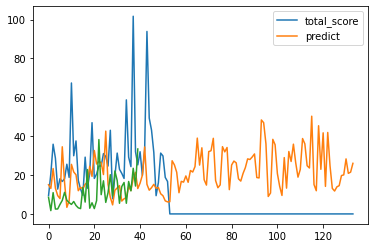

In [58]:
y_validate.drop(columns='index').plot()
y_train.plot()

<AxesSubplot:>

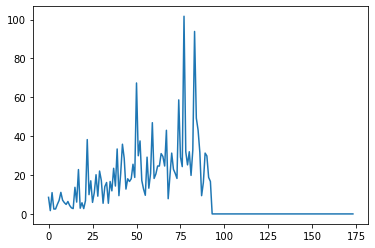

In [59]:
seinfeld.total_score.plot()

In [62]:
seinfeld_prepped.airdate = pd.to_datetime(seinfeld_prepped.airdate)
x=seinfeld_prepped.drop(columns=['plot','quotability','laughs','total_score']).set_index('airdate')
x_train = seinfeld_prepped.drop(columns=['plot','quotability','laughs','total_score'])[seinfeld_prepped.total_score > 0].set_index('airdate')
y_train = seinfeld_prepped.total_score[seinfeld_prepped.total_score > 0]
regr = MLPRegressor( max_iter=750,solver= 'lbfgs').fit(x_train,y_train)
mlp_predictions=pd.DataFrame(regr.predict(x),columns=['predict'])
y_mlp=pd.concat([y_train,mlp_predictions],axis=1)

<AxesSubplot:>

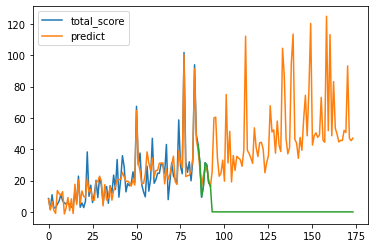

In [63]:
y_mlp.plot()
seinfeld[seinfeld.season_y > 5].total_score.plot()


In [64]:
for i in scripts.title.tolist():
    if 
        return(pd.DataFrame(i))

SyntaxError: invalid syntax (1548820041.py, line 2)

In [ ]:
seinfeld_prepped.corr()

In [66]:
grouped_scripts.Character.value_counts()/len(grouped_scripts.Character.sum())

SEID    Character 
S01E00  JERRY         0.540230
        GEORGE        0.402299
        KESSLER       0.114943
        LAURA         0.086207
        CLAIRE        0.040230
                        ...   
S09E23  PROSTITUTE    0.005747
        PUDDY         0.005747
        SECRETARY     0.005747
        STRANGER      0.005747
        SUSAN         0.005747
Name: Character, Length: 2634, dtype: float64

In [67]:
scripts['line']=scripts.Character.str.strip() +': ' + scripts.Dialogue.str.strip()

In [74]:
seinfeld['script'] = scripts.groupby('SEID').line
seinfeld.script = seinfeld.script.astype(str)

In [106]:
seinfeld.script[18]

"('S03E02', 4720    JERRY: Welcome everyone to the room...Ah, the ...\n4721    PATRICE: Everyone in my family's creative. And...\n4722       GEORGE: I don't understand. Paper Machay hats?\n4723                                       PATRICE: uh uh\n4724                            GEORGE: What if it rains?\n                              ...                        \n4976    JERRY: You're going by 48th St. You can give m...\n4977                 GEORGE: Hey, I'm getting in on that.\n4978                 ELAINE: You know you're chippin' in.\n4979                GEORGE: You're going that way anyway!\n4980    JERRY: I was audited last year. At first I tho...\nName: line, Length: 261, dtype: object)"